In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
!wget -q https://raw.githubusercontent.com/anshupandey/Machine_Learning_Training/master/datasets/image_data.zip

In [7]:
!unzip image_data.zip

Archive:  image_data.zip
replace image_data/car3.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: image_data/car3.png     
replace image_data/cat.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: image_data/cat.jpeg     
  inflating: image_data/cat2.jpg     
  inflating: image_data/data/dogs/dog.1.jpg  
  inflating: image_data/data/dogs/dog.10.jpg  
  inflating: image_data/data/dogs/dog.100.jpg  
  inflating: image_data/data/dogs/dog.101.jpg  
  inflating: image_data/data/dogs/dog.102.jpg  
  inflating: image_data/data/dogs/dog.103.jpg  
  inflating: image_data/data/dogs/dog.104.jpg  
  inflating: image_data/data/dogs/dog.105.jpg  
  inflating: image_data/data/dogs/dog.106.jpg  
  inflating: image_data/data/dogs/dog.107.jpg  
  inflating: image_data/data/dogs/dog.108.jpg  
  inflating: image_data/data/dogs/dog.109.jpg  
  inflating: image_data/data/dogs/dog.11.jpg  
  inflating: image_data/data/dogs/dog.110.jpg  
  inflating: image_data/data/dogs/dog.111.jpg  
  infla

In [8]:
img = plt.imread("/content/image_data/cat.jpeg")
img.shape

(350, 525, 3)

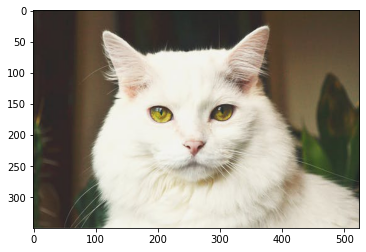

In [9]:
plt.imshow(img)
plt.show()

# Image Classification

In [10]:
import pandas  as pd
import numpy as np
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


## Data Preparation

In [11]:
main_folder = "/content/image_data/data/"
classnames = os.listdir(main_folder)
classnames

['Humans', 'dogs', 'horses']

In [41]:
x = []
y = []
for folder in classnames:
  filelist = os.listdir(main_folder+folder)
  for imgname in filelist:
    img = image.load_img(main_folder+folder+"/"+imgname,target_size=(80,80))
    img = image.img_to_array(img)
    x.append(img)
    y.append(classnames.index(folder))

In [42]:
x = np.array(x)
y = np.array(y)
# onehot encode the labels
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)
print(x.shape,y.shape)

(606, 80, 80, 3) (606, 3)


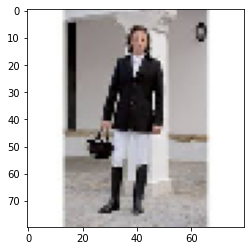

In [43]:
plt.imshow(x[0].astype('int32'))
plt.show()

In [44]:
# scaling the image to bring pixel values b/w 0 to 1
x = x/255

## Modelling the Convolutional Neural Network

* number of classes = 3
* numer of neurons on output layer = 3
* activation function on output layer = softmax
* loss = categorical_crossentropy

In [ ]:
!wget -q https://miro.medium.com/max/2000/1*1TI1aGBZ4dybR6__DI9dzA.png
img = plt.imread("1*1TI1aGBZ4dybR6__DI9dzA.png")


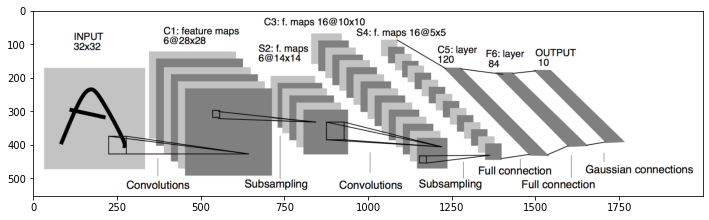

In [19]:
plt.figure(figsize=(12,4))
plt.imshow(img)
plt.show()

In [16]:
from tensorflow.keras import models,layers

In [53]:
ip_layer = layers.Input(shape=(80,80,3))

# feature extraction section
conv1 = layers.Conv2D(filters=6,kernel_size=(3,3),activation='relu')(ip_layer)
pool1 = layers.MaxPooling2D(pool_size=(2,2))(conv1)

conv2 = layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu')(pool1)
pool2 = layers.MaxPooling2D(pool_size=(2,2))(conv2)

# flatten layer convert an array to a 1D array, 5x5 will be converted to 1x25
ft = layers.Flatten()(pool2)

do = layers.Dropout(0.5)(ft)

# first hidden layer
h1 = layers.Dense(units=120,activation='relu')(do)

h1 = layers.Dropout(0.5)(h1)

# mroe hidden layers
h2 = layers.Dense(units=84,activation='relu')(h1)

#output layer
op = layers.Dense(3,activation='softmax')(h2)

model = models.Model(inputs=ip_layer,outputs=op)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 80, 80, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 78, 78, 6)         168       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 39, 39, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 16)        880       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 18, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5184)              0   

In [54]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(x,y,test_size=0.2,random_state=5)

In [55]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
model.fit(xtr,ytr,batch_size=32,epochs=20,validation_data=(xts,yts))

Epoch 1/20
16/16 [==============================] - 1s 26ms/step - loss: 1.1471 - accuracy: 0.3223 - val_loss: 1.0884 - val_accuracy: 0.4016
Epoch 2/20
16/16 [==============================] - 0s 12ms/step - loss: 1.0936 - accuracy: 0.3657 - val_loss: 1.0639 - val_accuracy: 0.3689
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 1.0414 - accuracy: 0.4318 - val_loss: 0.9995 - val_accuracy: 0.5246
Epoch 4/20
16/16 [==============================] - 0s 11ms/step - loss: 0.9568 - accuracy: 0.5744 - val_loss: 0.8789 - val_accuracy: 0.6639
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 0.8420 - accuracy: 0.6591 - val_loss: 0.8370 - val_accuracy: 0.6393
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.7550 - accuracy: 0.6942 - val_loss: 0.7401 - val_accuracy: 0.7049
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6794 - accuracy: 0.7231 - val_loss: 0.7042 - val_accuracy: 0.7131
Epoch 8/20
16

In [28]:
!wget -q https://idsb.tmgrup.com.tr/2018/05/22/horses-the-wings-of-mankind-1527015927739.jpg

In [23]:
!wget -q https://cdn.britannica.com/96/1296-050-4A65097D/gelding-bay-coat.jpg

In [32]:
!wget -q https://comps.canstockphoto.com/man-stock-photography_csp7345670.jpg

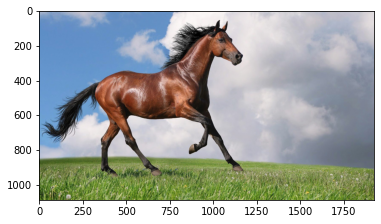

In [40]:
img = plt.imread("horses-the-wings-of-mankind-1527015927739.jpg")
plt.imshow(img)
plt.show()

In [48]:
img = image.img_to_array(image.load_img("horses-the-wings-of-mankind-1527015927739.jpg",target_size=(80,80)))
img = img/255
print(img.shape)
pred = model.predict(img.reshape(1,80,80,3))
print(pred)

(80, 80, 3)
[[0.4435112  0.00489305 0.55159575]]


In [49]:
max_porb = np.argmax(pred)
print(max_porb,classnames[max_porb])

2 horses
